In [3]:
import warnings
from importlib import reload

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from video import vid as v
from video import frame as f
from video import videolike as vl
from video.conversion import Conversions
from video import channel as c
from video.reader import VideoReader
from video.df import get_vid_df
import pandas as pd3
from cv2 import COLOR_BGR2HSV

In [2]:
warnings.simplefilter("ignore")
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Testing video pct_change function

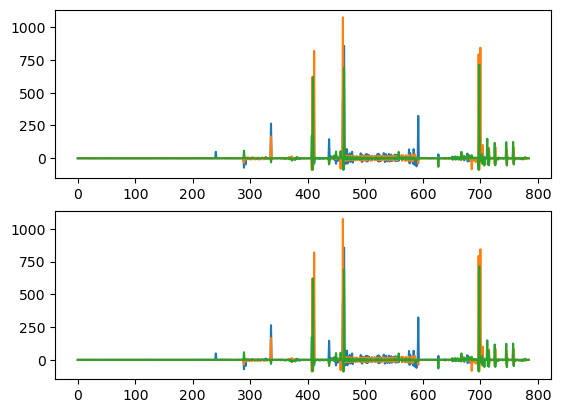

In [2]:
reload(v)
reload(vl)
reload(c)
vid_path = 'videos/Banned Pokemon Seizure Scene.mp4'
unsafe_vid = v.Video.from_file(vid_path,Conversions.HSV)
fig,axs = plt.subplots(2,1)
axs[0].plot(unsafe_vid.pct_change(1,agg='sum'))
axs[1].plot(unsafe_vid.hue.pct_change(1,agg='sum'))
axs[1].plot(unsafe_vid.saturation.pct_change(1,agg='sum'))
axs[1].plot(unsafe_vid.value.pct_change(1,agg='sum'))

`pct_change` on fade video

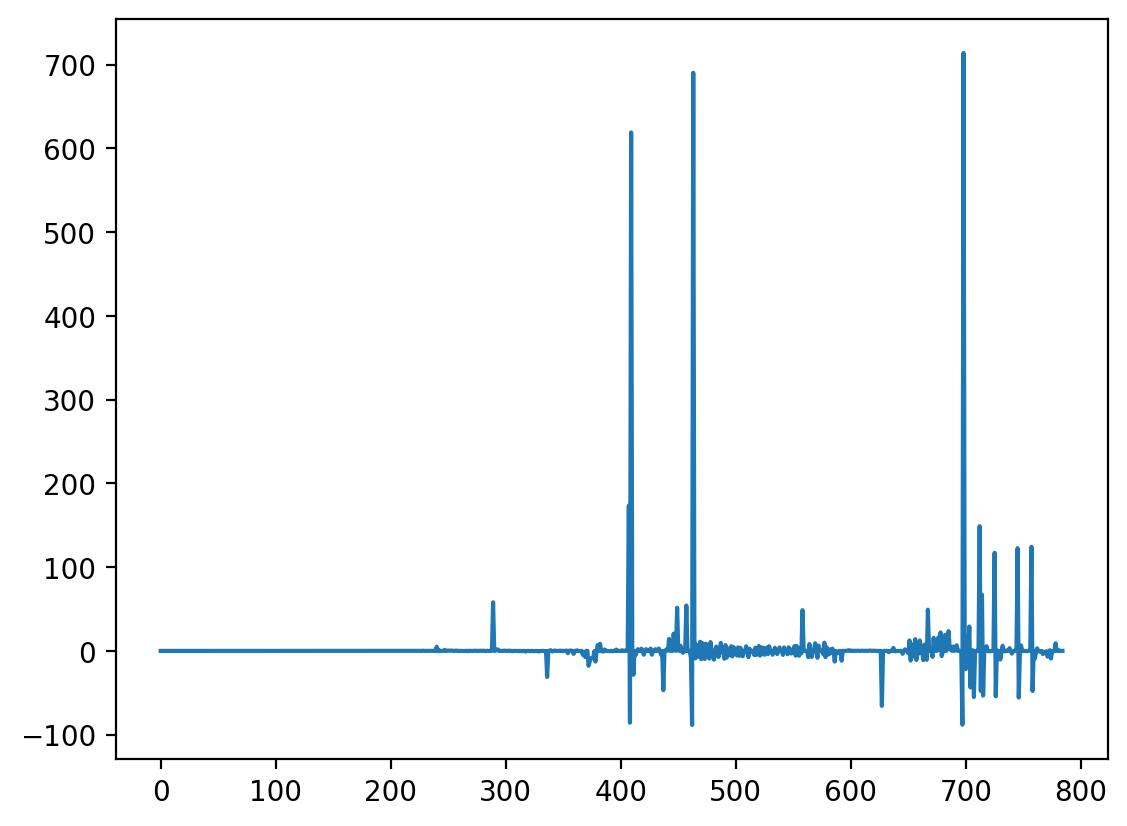

In [ ]:
safe_vid = v.Video.from_file('videos/Blue Green Fade.mp4')
agg_vid = unsafe_vid.mask().value.pct_change(1,agg=lambda i: np.mean(i,axis=1))
plt.plot(agg_vid)

## A Look at all the videos

In [ ]:
agg_list = v.Video.analyze_vids(Conversions.HSV, 'agg', mask_channel='value', agg_channel='value')

In [ ]:
len(agg_list)

20

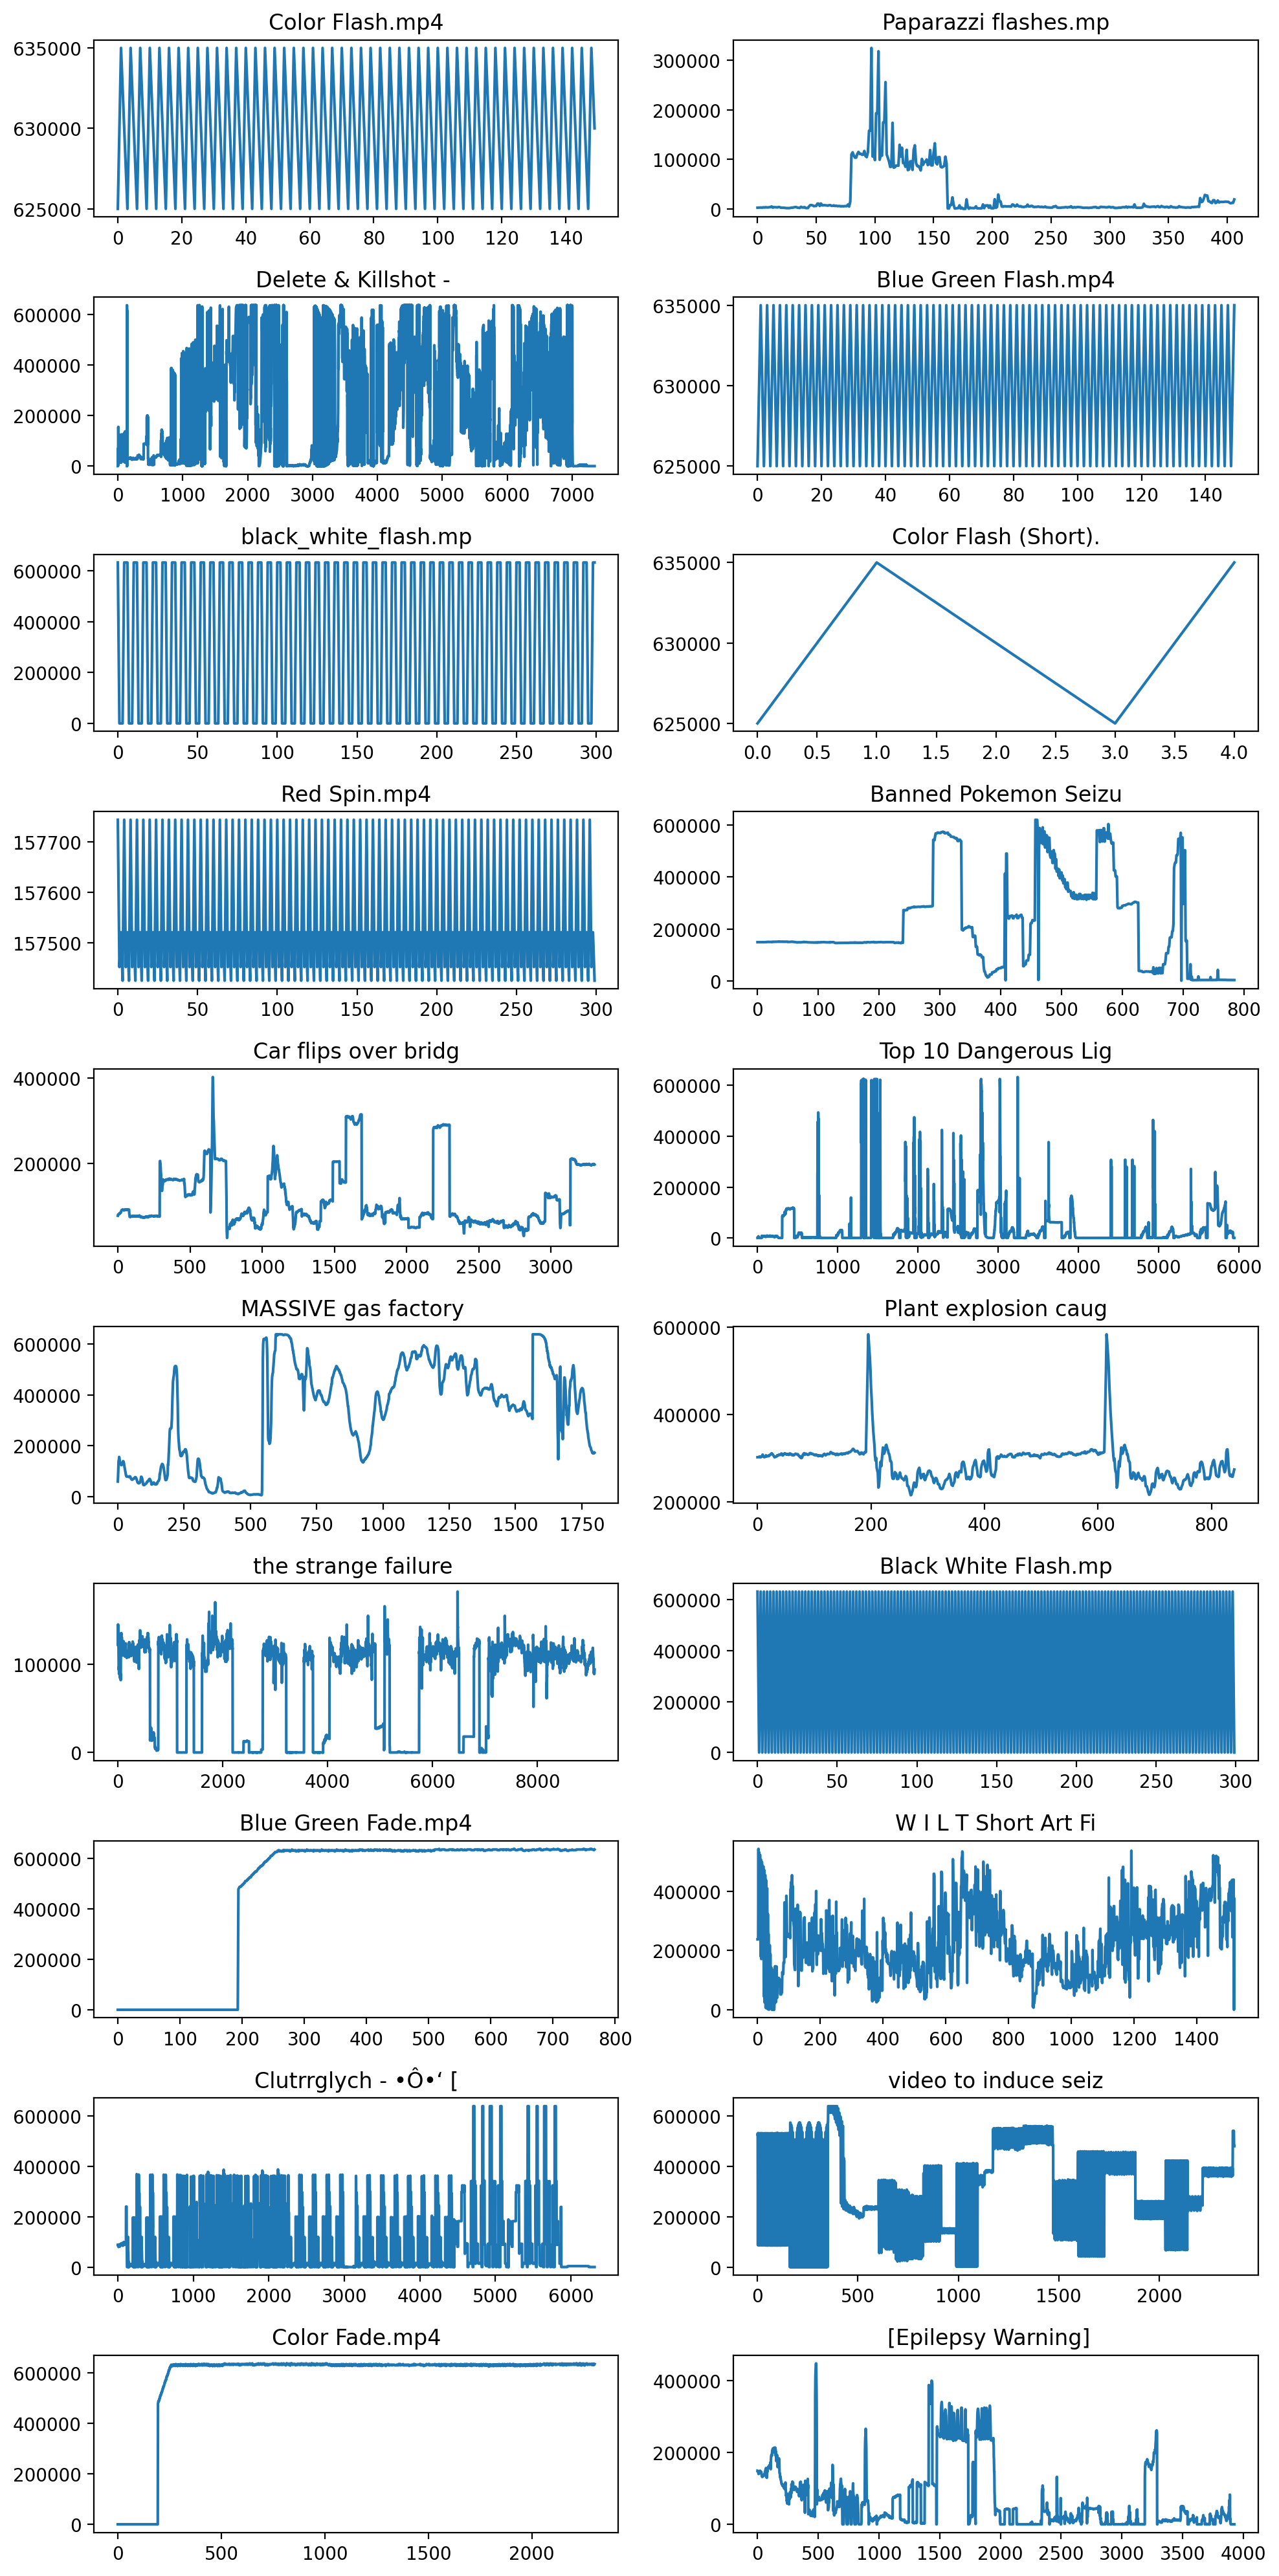

In [ ]:
n = 2
fig, axs = plt.subplots(len(agg_list)//n, n,figsize=(10,20))
for i, vid in enumerate(agg_list.items()):
    x = i // n
    y = i % n
    axs[x][y].plot(vid[1])
    axs[x][y].set_title(vid[0][:20],wrap=True)
fig.tight_layout()

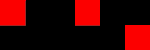

In [8]:
reload(v)
red_spin = v.Video.from_file('videos/Red Spin.mp4')
split_vid = red_spin.segment(2)
split_vid[:3].show()
red_spin[:3].show()